# EDA - Retail Chain - Part 2

## Exploratory Data Analysis

***Disclaimer***

**The exploratory analysis presented here is not intended to be an exhaustive analysis. In fact, to some extent we can say that no Exploratory Analysis will ever be complete. There is always some new 'angle' from which to approach the data.**

---

[Python Cheatsheet](../utils/Python_Cheatsheet.pdf)

[Pandas Cheatsheet](../utils/Pandas_Cheat_Sheet.pdf)

[Numpy Cheatsheet](../utils/Numpy_Python_Cheat_Sheet.pdf)

---

**Necessary packages**

In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style = 'white')

---

## Customers

**Data import (file *pickle* previously saved)**

In [84]:
cust_df = pd.read_pickle(os.path.join('temp', 'customer_eda.pkl'))

In [85]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   object        
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   category      
 3   city_code    5647 non-null   category      
 4   age          5647 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 143.6+ KB


In [86]:
N = cust_df.customer_Id.nunique()
print(f'Number of customers: {N}')

Number of customers: 5647


### Gender

**From a categorical and / or numeric variable it counts how many lines we have for each value of the variable I am delivering.
How many customers do I have by gender?**

In [87]:
print(cust_df['Gender'].value_counts()) 
print('\n')
print(cust_df['Gender'].value_counts(normalize=True)*100)

#normalize gives a range between 0 and 1, in this case, between 0 and 100 is specified to present the values in percentage format.

Masculino    2892
Feminino     2753
Name: Gender, dtype: int64


Masculino    51.231178
Feminino     48.768822
Name: Gender, dtype: float64


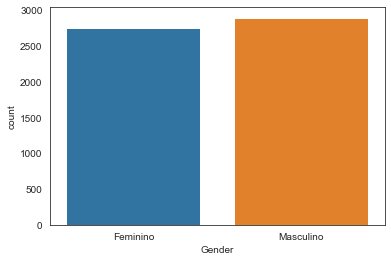

In [88]:
sns.countplot(x=cust_df['Gender'])
plt.show()

### City

In [89]:
cust_df['city_code'].value_counts()#.index

3.0     595
5.0     586
4.0     582
7.0     575
2.0     564
8.0     562
10.0    558
1.0     551
9.0     546
6.0     526
nan       2
Name: city_code, dtype: int64

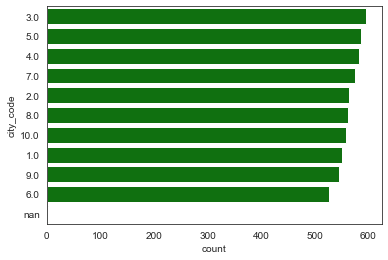

In [90]:
sns.countplot(y=cust_df['city_code'],
              color='g',
              order=cust_df['city_code'].value_counts().index,
             )
plt.show()

**The city with code "3" is the one with the most customers**

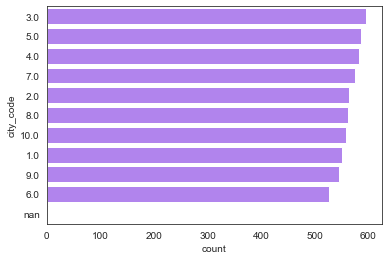

In [91]:
sns.countplot(y=cust_df['city_code'],
              color='#af72ff',
              order=cust_df['city_code'].value_counts().index,
             )
plt.show()

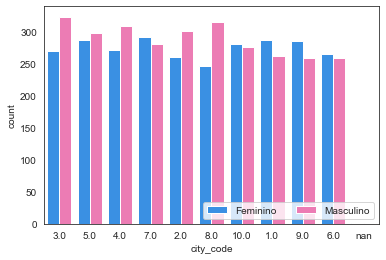

In [92]:
col_palette = ['dodgerblue', 'hotpink']

ax = sns.countplot(data=cust_df,
                  x='city_code',
                  hue='Gender', #hue receives a variable under which to divide the results.
                  palette=col_palette,
                  order=cust_df['city_code'].value_counts().index,
                 )
ax.legend(ncol=2, loc='lower right') #loc allows you to change the location of the caption. ncol = 2 places the caption horizontally
plt.show()

**In cities 1, 9, 7, 10 and 6, the female gender is more frequent. In the others, the male gender is more frequent.**

### Idade*
\* ***Calculated in the previous notebook "EDA - Retail Chain"***

In [93]:
cust_df.describe()

,age
count,5647.000000
mean,39.091199
std,6.621250
min,28.000000
25%,33.000000
50%,39.000000
75%,45.000000
max,51.000000


**The ages of customers vary between 27 and 50 years, with the average being around 38 years.**

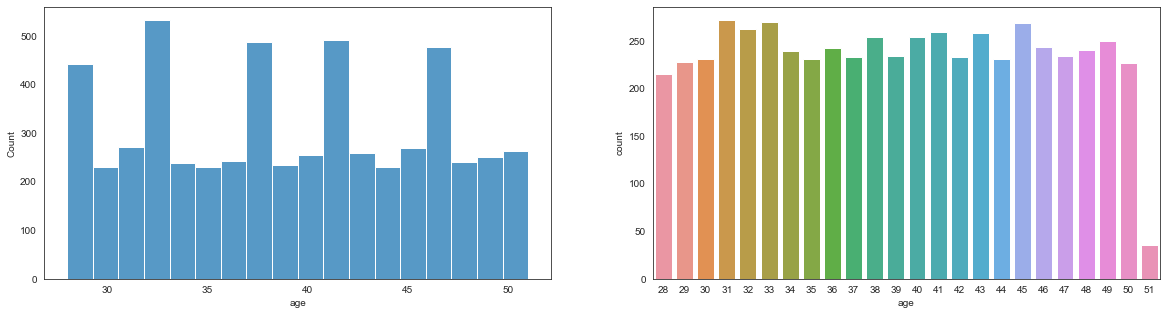

In [94]:
plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(x = cust_df["age"], kde=False)
plt.subplot(1, 2, 2)
sns.countplot(x = cust_df["age"])

plt.show()

**In a discrete variable, the analysis of the histogram should be done with some caution. In this case, the 'peaks' resulted from the creation of the histogram intervals, when 'taking' two age values, and not from a higher frequency of certain ages.**

---

## Transactions

Data import (file *pickle* previously saved)

In [95]:
df = pd.read_pickle(os.path.join('temp', 'df_eda.pkl'))

### Create some auxiliary variables

**Define lists with different types of variables**

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22703 entries, 0 to 22702
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    22703 non-null  int64         
 1   cust_id           22703 non-null  int64         
 2   tran_date         22703 non-null  object        
 3   prod_subcat_code  22703 non-null  int64         
 4   prod_cat_code     22703 non-null  int64         
 5   Qty               22703 non-null  int64         
 6   Rate              22703 non-null  int64         
 7   Tax               22703 non-null  float64       
 8   total_amt         22703 non-null  float64       
 9   Store_type        22703 non-null  object        
 10  prod_cat          22703 non-null  object        
 11  prod_subcat       22703 non-null  object        
 12  year              22703 non-null  int64         
 13  tran_date_dt      22703 non-null  datetime64[ns]
dtypes: datetime64[ns](1), 

In [97]:
categorical = ['prod_cat', 'prod_subcat', 'Store_type', 'tran_date_dt', 'year']
numerical = ['Qty', 'Rate', 'Tax', 'total_amt']
discarded = ['transaction_id', 'cust_id', 'tran_date', 'prod_cat_code', 'prod_subcat_code']

In [98]:
#df[categorical]

#Df.columns will give a list of columns. .difference will remove what we put between ()

df.loc[:,df.columns.difference(discarded)]

,Qty,Rate,Store_type,Tax,prod_cat,prod_subcat,total_amt,tran_date_dt,year
0,-5,-772,e-Shop,405.300,Clothing,Women,-4265.300,2014-02-28,2014
1,5,772,e-Shop,405.300,Clothing,Women,4265.300,2014-02-20,2014
2,1,714,MBR,74.970,Clothing,Women,788.970,2014-02-15,2014
3,5,595,TeleShop,312.375,Clothing,Women,3287.375,2014-02-14,2014
4,2,996,e-Shop,209.160,Clothing,Women,2201.160,2014-02-12,2014
...,...,...,...,...,...,...,...,...,...
22698,4,531,e-Shop,223.020,Bags,Mens,2347.020,2011-02-01,2011
22699,5,1043,e-Shop,547.575,Bags,Mens,5762.575,2011-02-01,2011
22700,5,361,MBR,189.525,Bags,Mens,1994.525,2011-01-31,2011
22701,1,1470,e-Shop,154.350,Bags,Mens,1624.350,2011-01-30,2011


In [99]:
print(f"Shape: {df.shape} \n\nUnique values:\n{df.nunique()}")

Shape: (22703, 14) 

Unique values:
transaction_id      20761
cust_id              5503
tran_date            1128
prod_subcat_code       12
prod_cat_code           6
Qty                    10
Rate                 2517
Tax                  4191
total_amt            5703
Store_type              4
prod_cat                6
prod_subcat            18
year                    4
tran_date_dt         1128
dtype: int64


**Let's create the 'month' variable with the month (see how we created the 'year').** <br/>
**And add to the corresponding list.**

In [100]:
df['month'] = df['tran_date_dt'].dt.month

In [101]:
categorical.append('month')

In [102]:
categorical

['prod_cat', 'prod_subcat', 'Store_type', 'tran_date_dt', 'year', 'month']

In [103]:
df.groupby(['prod_cat','prod_subcat'])[['cust_id']].nunique()

cust_id
prod_cat         prod_subcat                 
Bags             Mens                     839
                 Women                    807
Books            Academic                 794
                 Children                 857
                 Comics                   856
                 DIY                      835
                 Fiction                  865
                 Non-Fiction              830
Clothing         Kids                     820
                 Mens                     796
                 Women                    832
Electronics      Audio and video          810
                 Cameras                  824
                 Computers                810
                 Mobiles                  873
                 Personal Appliances      816
Footwear         Kids                     834
                 Mens                     792
                 Women                    869
Home and kitchen Bath                     847
                 Furnishing               844
                 Kitchen                  854
                 Tools                    878

**What is the number of unique products purchased per customer? (how to calculate?)**

In [104]:
df['prod'] = df['prod_cat'] + ', ' + df['prod_subcat']

In [105]:
categorical.append('prod')

<AxesSubplot:>

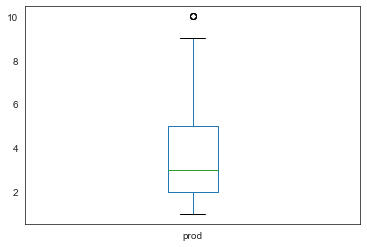

In [106]:
df.groupby('cust_id')['prod'].nunique().plot(kind='box')

**The next step may be, for example, to analyze the distribution of this variable.**

<AxesSubplot:ylabel='Frequency'>

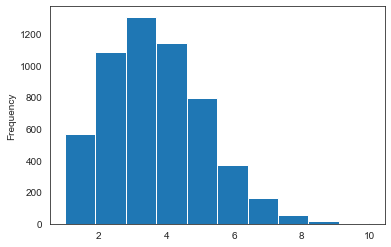

In [107]:
df.groupby('cust_id')['prod'].nunique().plot(kind='hist')

## Categorical Variables

In [108]:
df[categorical]

,prod_cat,prod_subcat,Store_type,tran_date_dt,year,month,prod
0,Clothing,Women,e-Shop,2014-02-28,2014,2,"Clothing, Women"
1,Clothing,Women,e-Shop,2014-02-20,2014,2,"Clothing, Women"
2,Clothing,Women,MBR,2014-02-15,2014,2,"Clothing, Women"
3,Clothing,Women,TeleShop,2014-02-14,2014,2,"Clothing, Women"
4,Clothing,Women,e-Shop,2014-02-12,2014,2,"Clothing, Women"
...,...,...,...,...,...,...,...
22698,Bags,Mens,e-Shop,2011-02-01,2011,2,"Bags, Mens"
22699,Bags,Mens,e-Shop,2011-02-01,2011,2,"Bags, Mens"
22700,Bags,Mens,MBR,2011-01-31,2011,1,"Bags, Mens"
22701,Bags,Mens,e-Shop,2011-01-30,2011,1,"Bags, Mens"


### Category

**Category with the most transactions:**

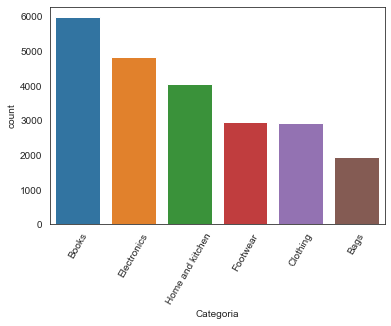

In [109]:
sns.countplot(data=df,
              x='prod_cat',
              order=df['prod_cat'].value_counts().index)
plt.xlabel('Categoria')
plt.xticks(rotation=60)
plt.show()

**Catplot - categorical plot - most suitable chart for categories**

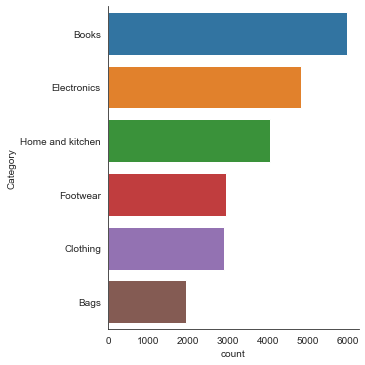

In [110]:
sns.catplot(data=df,
            y='prod_cat',
            kind='count',
            order=df['prod_cat'].value_counts().index,)
plt.ylabel('Category')
# plt.xticks(rotation=90)
plt.show()

**Interaction between 2 variables. ci = None refers to the confidence interval. </br>
**Through estimator = np.sum we are asking to make a sum using a numpy function. It takes a vector and adds it.**

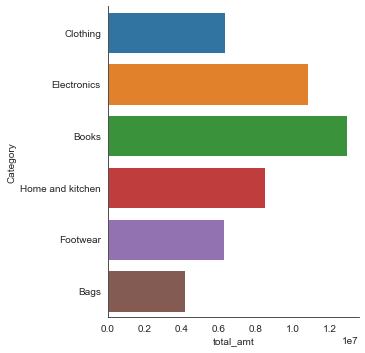

In [111]:
sns.catplot(data=df,
            x='total_amt',
            y='prod_cat',
            kind='bar',
            ci=None,
            estimator=np.sum
            )
plt.ylabel('Category')
#plt.xticks(rotation=90)
plt.show()

**Sort categories by total sales volume and quantity**

In [112]:
df.groupby('prod_cat')[['total_amt', 'Qty']].sum().sort_values(ascending=False, by=['total_amt'])

,total_amt,Qty
prod_cat,,
Books,1.289560e+07,14751
Electronics,1.078616e+07,12372
Home and kitchen,8.495470e+06,10013
Clothing,6.300005e+06,7219
Footwear,6.265975e+06,7331
Bags,4.160107e+06,4748


**NOTE:'count' gives us the count of 'movements' and not the amount**

In [113]:
df.groupby('prod_cat').agg({'total_amt': 'sum', 'cust_id': 'nunique'}).rename({'total_amt' : 'total_amt_sum', 'cust_id': 'unique_cust'})

,total_amt,cust_id
prod_cat,,
Bags,4.160107e+06,1516
Books,1.289560e+07,3468
Clothing,6.300005e+06,2109
Electronics,1.078616e+07,3077
Footwear,6.265975e+06,2132
Home and kitchen,8.495470e+06,2707


**Sort categories by total received and quantity (including returns)**

TOTAL

In [114]:
tmp_amt = df.groupby('prod_cat')[['total_amt']].sum().sort_values(ascending=False, by='total_amt').reset_index()
tmp_amt

,prod_cat,total_amt
0,Books,1.289560e+07
1,Electronics,1.078616e+07
2,Home and kitchen,8.495470e+06
3,Clothing,6.300005e+06
4,Footwear,6.265975e+06
5,Bags,4.160107e+06


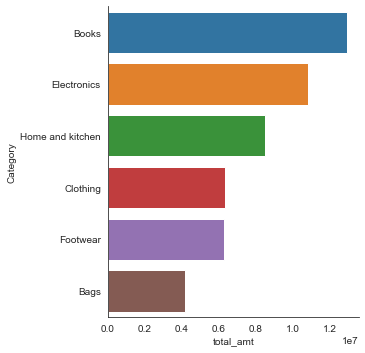

In [115]:
sns.catplot(data=tmp_amt,
            x='total_amt',
            y='prod_cat',
            kind='bar',
            ci=None,
            estimator=np.sum
            )
plt.ylabel('Category')
plt.show()

**Quantity**

In [116]:
df.groupby('prod_cat')['Qty'].sum().sort_values()#.index

prod_cat
Bags                 4748
Clothing             7219
Footwear             7331
Home and kitchen    10013
Electronics         12372
Books               14751
Name: Qty, dtype: int64

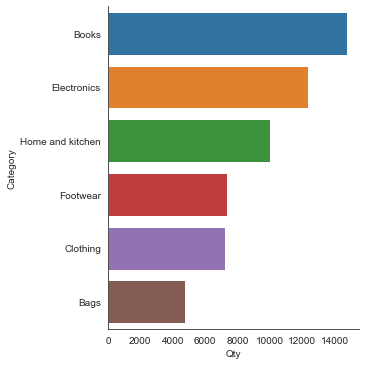

In [117]:
sns.catplot(data=df,
            x='Qty',
            y='prod_cat',
            kind='bar',
            ci=None,
            estimator=np.sum,
            order=df.groupby('prod_cat')['Qty'].sum().sort_values(ascending=False).index
            )
plt.ylabel('Category')
plt.show()

In [118]:
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,month,prod
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,2,"Clothing, Women"
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,2014,2014-02-20,2,"Clothing, Women"
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women,2014,2014-02-15,2,"Clothing, Women"
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,2014,2014-02-14,2,"Clothing, Women"
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-02-12,2,"Clothing, Women"


**Calculate the net amount received (total excluding tax) by store type:**

**To find the total value that each store is earning we have to consider returns. When we multiply negative values by equally negative values, we get positive values. To avoid this we use "abs" to keep 1 of the values with their absolute value.**

In [119]:
df['total_without_tax'] = df['Rate'] * abs(df['Qty'])

In [120]:
df.groupby('Store_type')[['total_without_tax', 'total_amt']].sum()

,total_without_tax,total_amt
Store_type,,
Flagship store,8850801,9.780135e+06
MBR,8824589,9.751171e+06
TeleShop,8535215,9.431413e+06
e-Shop,18045790,1.994060e+07


**Number of customers for each type of store:**

In [121]:
df.groupby('Store_type')['cust_id'].nunique()

Store_type
Flagship store    2930
MBR               2988
TeleShop          2899
e-Shop            4357
Name: cust_id, dtype: int64

In [122]:
df.info(), cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22703 entries, 0 to 22702
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22703 non-null  int64         
 1   cust_id            22703 non-null  int64         
 2   tran_date          22703 non-null  object        
 3   prod_subcat_code   22703 non-null  int64         
 4   prod_cat_code      22703 non-null  int64         
 5   Qty                22703 non-null  int64         
 6   Rate               22703 non-null  int64         
 7   Tax                22703 non-null  float64       
 8   total_amt          22703 non-null  float64       
 9   Store_type         22703 non-null  object        
 10  prod_cat           22703 non-null  object        
 11  prod_subcat        22703 non-null  object        
 12  year               22703 non-null  int64         
 13  tran_date_dt       22703 non-null  datetime64[ns]
 14  month 

(None, None)

**Add customer information to the transaction table:**

In [123]:
cust_df['customer_Id'] = cust_df['customer_Id'].astype(int) #so that the types of variables are the same (check with .info () before joining)

In [124]:
print(df.shape)
df_with_cust = pd.merge(df, cust_df, left_on='cust_id', right_on='customer_Id').drop('customer_Id', axis=1)

(22703, 17)


In [125]:
print(df_with_cust.shape)

(22703, 21)


In [126]:
df_with_cust.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,...,prod_subcat,year,tran_date_dt,month,prod,total_without_tax,DOB,Gender,city_code,age
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,...,Women,2014,2014-02-28,2,"Clothing, Women",-3860,1981-09-26,Masculino,5.0,39
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,...,Women,2014,2014-02-20,2,"Clothing, Women",3860,1981-09-26,Masculino,5.0,39
2,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,...,DIY,2011,2011-12-13,12,"Books, DIY",1048,1981-09-26,Masculino,5.0,39
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,...,Personal Appliances,2013,2013-03-18,3,"Electronics, Personal Appliances",3090,1981-09-26,Masculino,5.0,39
4,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,...,Women,2013,2013-09-16,9,"Footwear, Women",1083,1981-09-26,Masculino,5.0,39


**By Store_type and Gender:**

In [127]:
df_with_cust.groupby(['Store_type', 'Gender']).agg({'total_amt': 'sum', 'Qty': 'sum', 'age': 'mean', 'cust_id': 'nunique', 'prod': 'nunique'})

total_amt    Qty        age  cust_id  prod
Store_type     Gender                                                  
Flagship store Feminino   4.701039e+06   5453  39.007651     1428    23
               Masculino  5.079096e+06   5751  39.031140     1502    23
MBR            Feminino   4.783227e+06   5487  39.024118     1437    23
               Masculino  4.960758e+06   5768  38.984329     1549    23
TeleShop       Feminino   4.534752e+06   5262  38.975932     1396    23
               Masculino  4.883490e+06   5789  39.285900     1501    23
e-Shop         Feminino   9.771469e+06  11279  39.231044     2109    23
               Masculino  1.016886e+07  11624  39.186806     2247    23

**By Product:**

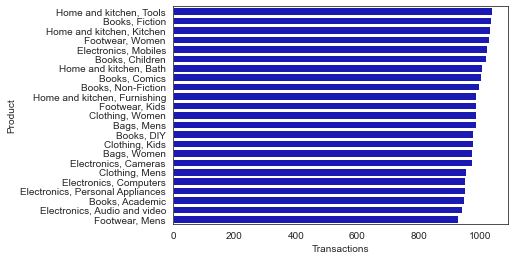

In [128]:
sns.countplot(data=df,
              y='prod',
              order=df['prod'].value_counts().index,
              color='mediumblue')
plt.xlabel('Transactions')
plt.ylabel('Product')

plt.show()

**Store_type by product category:**

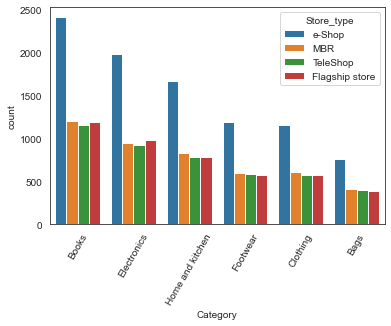

In [129]:
sns.countplot(data=df,
              x='prod_cat',
              order=df['prod_cat'].value_counts().index,
              hue='Store_type')
plt.xlabel('Category')
plt.xticks(rotation=60)
plt.show()

**Product category by Store_type:**

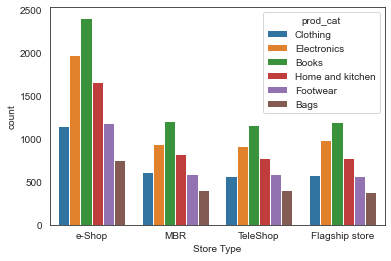

In [130]:
sns.countplot(data=df,
              x='Store_type',
              hue='prod_cat')
plt.xlabel('Store Type')
# plt.xticks(rotation=90)
plt.show()

## Numeric:

### Transactions

**NOTE: It is important to be well defined what level of "detail" we hope to analyze at each step. Ex: From what we've analyzed so far, what is a "transaction"?**

### Total received (variable *total_amt* - per day)
[Cash flow]

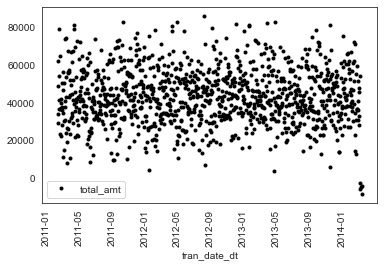

In [131]:
df[['tran_date_dt', 'total_amt']].groupby('tran_date_dt').sum().plot(style='k.')
plt.xticks(rotation=90)
plt.show()

**Distribution of the 'total_amt' variable**

<AxesSubplot:>

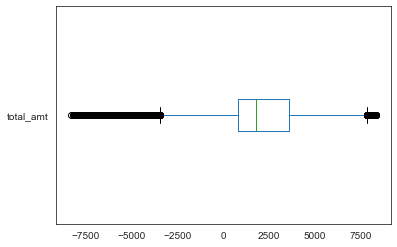

In [132]:
df['total_amt'].plot(kind='box', vert=False) #Horizontal instead of vertical

<AxesSubplot:ylabel='Frequency'>

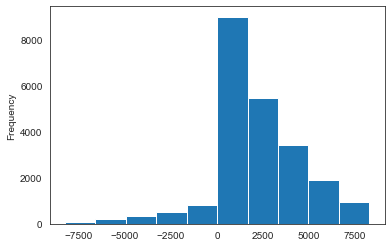

In [133]:
df['total_amt'].plot(kind='hist')

**By month:**

<AxesSubplot:xlabel='tran_date_dt'>

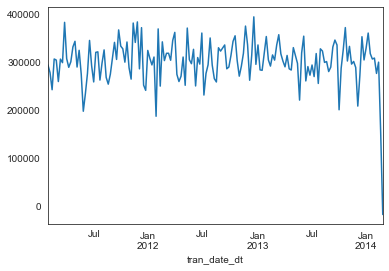

In [134]:
tmp = df.groupby(pd.Grouper(key='tran_date_dt', freq='1W'))['total_amt'].sum()
tmp.plot()

In [135]:
df.groupby(['year', 'month'])['total_amt'].sum()

year  month
2011  1         331464.640
      2        1103763.505
      3        1384067.750
      4        1373052.005
      5        1197832.155
      6        1239214.405
      7        1321872.825
      8        1234290.525
      9        1448278.195
      10       1405867.190
      11       1455712.635
      12       1341368.340
2012  1        1207872.185
      2        1315303.600
      3        1447586.465
      4        1220192.935
      5        1360073.780
      6        1314652.755
      7        1250743.975
      8        1329027.700
      9        1332993.545
      10       1418161.420
      11       1382175.990
      12       1424371.520
2013  1        1380550.535
      2        1207323.000
      3        1471517.450
      4        1282123.765
      5        1287017.810
      6        1269650.525
      7        1240319.405
      8        1405480.440
      9        1343270.045
      10       1377218.960
      11       1280785.610
      12       1262754.220
2014  1        1

In [136]:
tmp.describe()

count       162.000000
mean     301872.323920
std       46971.604589
min      -17054.570000
25%      283446.036250
50%      304388.825000
75%      329291.381250
max      394670.640000
Name: total_amt, dtype: float64

In [137]:
tmp.tail(15)

tran_date_dt
2013-11-24    301768.870
2013-12-01    289180.710
2013-12-08    208786.435
2013-12-15    272754.885
2013-12-22    353298.335
2013-12-29    304882.760
2014-01-05    329677.855
2014-01-12    360909.575
2014-01-19    318060.990
2014-01-26    306828.665
2014-02-02    308798.880
2014-02-09    276809.130
2014-02-16    300290.380
2014-02-23    154519.885
2014-03-02    -17054.570
Freq: W-SUN, Name: total_amt, dtype: float64

**Looking at the last week we see that we have transactions but no longer have purchases. Qty is always negative.**

In [138]:
df[df['tran_date_dt'] >= '2014-02-21'] 

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,month,prod,total_without_tax
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,2,"Clothing, Women",-3860
987,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,2014,2014-02-27,2,"Electronics, Computers",-7485
2916,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,2014,2014-02-24,2,"Home and kitchen, Bath",-4089
2917,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,2014,2014-02-22,2,"Home and kitchen, Bath",-1450
3921,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,2014,2014-02-21,2,"Electronics, Personal Appliances",-2324
4873,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,2014,2014-02-22,2,"Home and kitchen, Tools",-1225
5911,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,2014,2014-02-22,2,"Clothing, Kids",-2724


## Bivariate

**We can analyze the bivariate correlation of the numerical variables, either through a pairplot or a heatmap. This will help us to understand which pair of variables is most related to each other.**

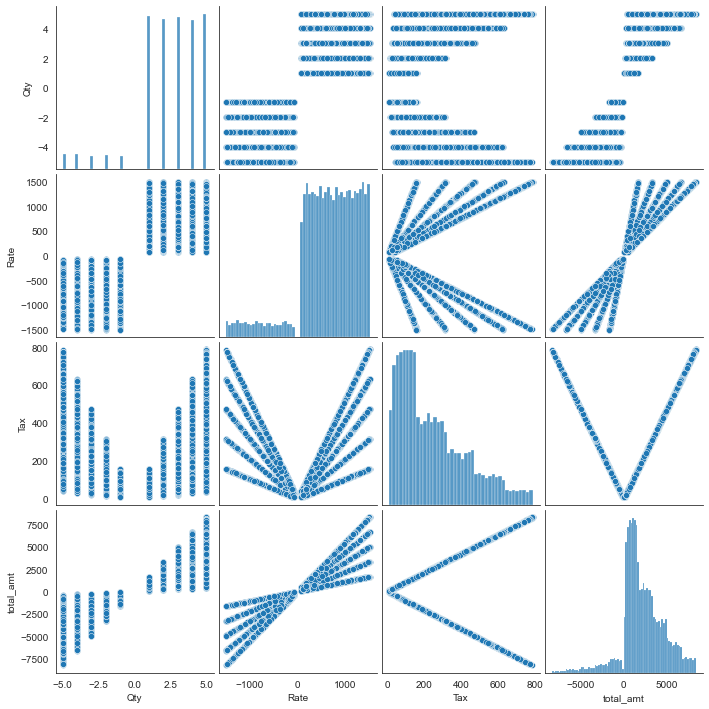

In [139]:
sns.pairplot(df_with_cust[numerical])

<AxesSubplot:>

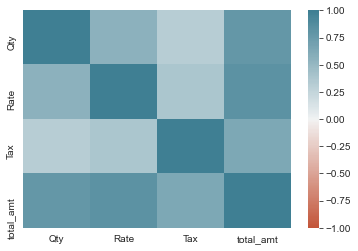

In [140]:
corr = df_with_cust[numerical].corr()
sns.heatmap(corr,
            vmin = -1, #so that the scale is adapted at 1 and -1
            vmax = 1,
            cmap=sns.diverging_palette(20, 220, n=200)
           )

In [141]:
corr

,Qty,Rate,Tax,total_amt
Qty,1.000000,0.558978,0.323578,0.784077
Rate,0.558978,1.000000,0.386954,0.823257
Tax,0.323578,0.386954,1.000000,0.648599
total_amt,0.784077,0.823257,0.648599,1.000000


**Remember the *countplot* of the previous category.**

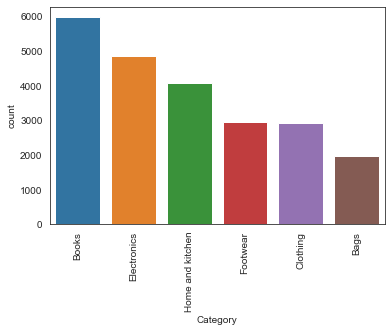

In [142]:
sns.countplot(data=df,
              x='prod_cat',
              order=df['prod_cat'].value_counts().index)
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

**Instead of number of lines per category, we may be (more) interested in variables such as 'total spent', 'Rate' or 'quantity'**

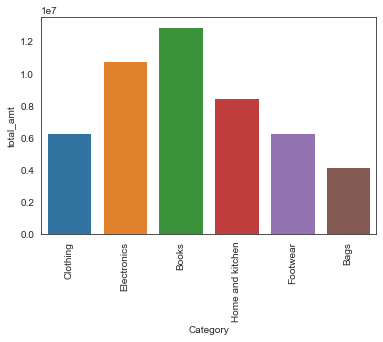

In [143]:
sns.barplot(data=df,
            x='prod_cat',
            y='total_amt',
            estimator=np.sum,
            ci=None,
           )
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

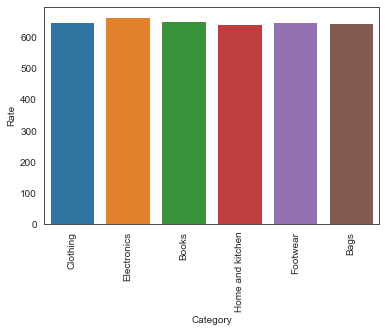

In [144]:
sns.barplot(data=df,
            x='prod_cat',
            y='Rate',
            estimator=np.mean,
            ci=None,
           )
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

## If we want to predict the purchases that will be returned
(we previously rejected those that were "returned more than 1 time", but we could only discard "additional returns")

**Create a variable that identifies the purchases that were returned and add them to the table**

In [145]:
returned_ids = df_with_cust[df_with_cust['Qty'] < 0]['transaction_id'].unique()
df_with_cust['returned'] = df_with_cust.transaction_id.isin(returned_ids)

In [146]:
df_with_cust.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,...,year,tran_date_dt,month,prod,total_without_tax,DOB,Gender,city_code,age,returned
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,...,2014,2014-02-28,2,"Clothing, Women",-3860,1981-09-26,Masculino,5.0,39,True
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,...,2014,2014-02-20,2,"Clothing, Women",3860,1981-09-26,Masculino,5.0,39,True
2,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,...,2011,2011-12-13,12,"Books, DIY",1048,1981-09-26,Masculino,5.0,39,False
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,...,2013,2013-03-18,3,"Electronics, Personal Appliances",3090,1981-09-26,Masculino,5.0,39,False
4,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,...,2013,2013-09-16,9,"Footwear, Women",1083,1981-09-26,Masculino,5.0,39,False


**Withdrawing returns (why?)**

In [147]:
df_purchases = df_with_cust[df_with_cust['Qty'] > 0]

### Analysis

**Correlation (to remember that we should do it when we think about making predictions, to exclude highly correlated variables - positively or negatively - we keep only one of them)**

<AxesSubplot:>

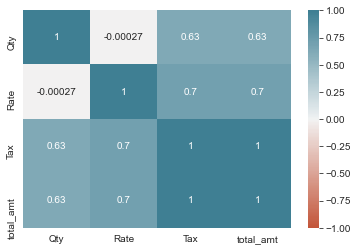

In [148]:
corr = df_purchases[numerical].corr()
sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True) #writes the correlation. This is a little different because we only have purchases and not returns.

**We can analyze the relationships between the variables, 2 to 2, checking if they have any effect on our variable of interest:**
- "*" unpacks a list and adds the values where we are asking for. Hue creates the interpretation division - whether the article was returned or not.

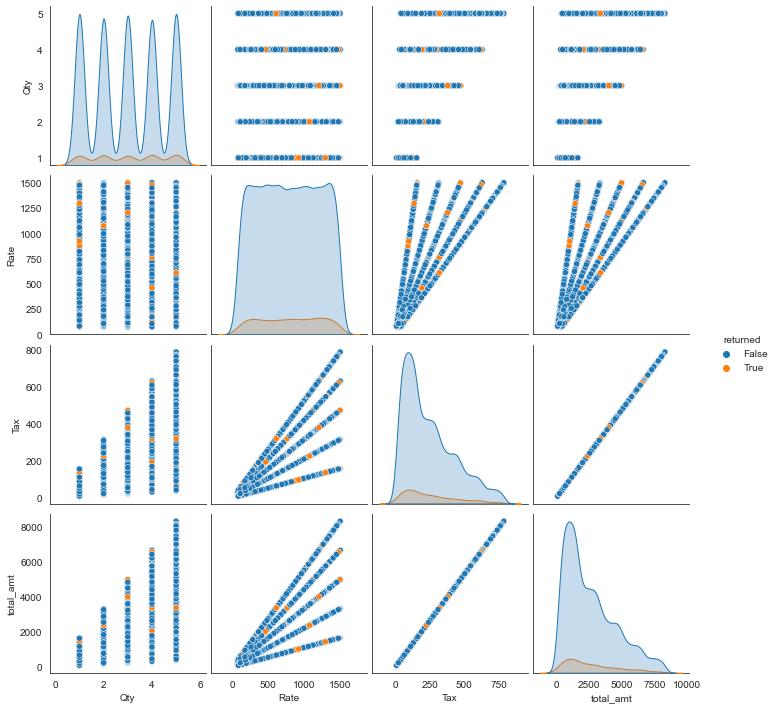

In [149]:
sns.pairplot(df_purchases[[*numerical, 'returned']], hue='returned')

<AxesSubplot:xlabel='returned', ylabel='count'>

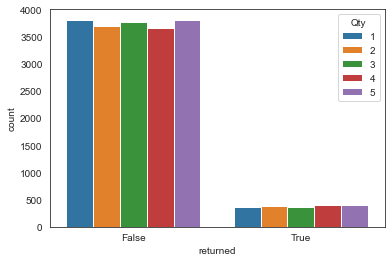

In [150]:
sns.countplot(data=df_purchases, x='returned', hue='Qty')

<AxesSubplot:xlabel='age', ylabel='total_without_tax'>

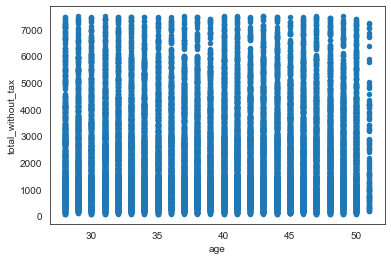

In [151]:
df_purchases[~df_purchases['returned']][['age', 'total_without_tax']].plot(x='age', y='total_without_tax', kind='scatter')